In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_pca0 = pd.read_csv("results/scores_pca__pca0.csv")
df_pca1 = pd.read_csv("results/scores_pca__pca1.csv")
df_pca2 = pd.read_csv("results/scores_pca__pca2.csv")

data_r_corr = {
    'pc0' : df_pca0["pearsonr"],
    'pc1' : df_pca1["pearsonr"],
    'pc2' : df_pca2["pearsonr"],
}

data_r2_corr = {
    'pc0' : df_pca0["r2_corr"],
    'pc1' : df_pca1["r2_corr"],
    'pc2' : df_pca2["r2_corr"],
}

df_r_corr = pd.DataFrame(data_r_corr)
df_r2_corr = pd.DataFrame(data_r2_corr)


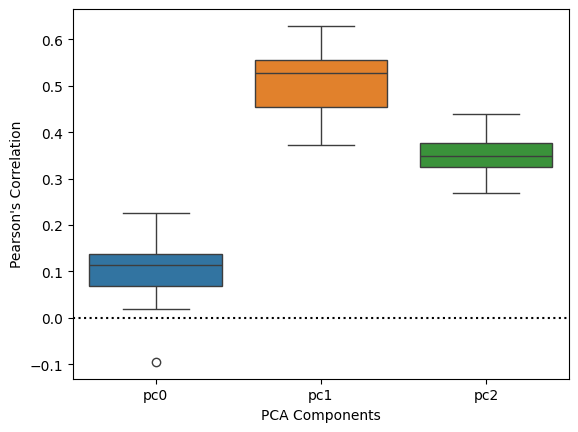

In [3]:
sns.boxplot(data=df_r_corr)
plt.axhline(0, color="k", ls=":")
plt.xlabel('PCA Components')
plt.ylabel("Pearson's Correlation")
plt.show()

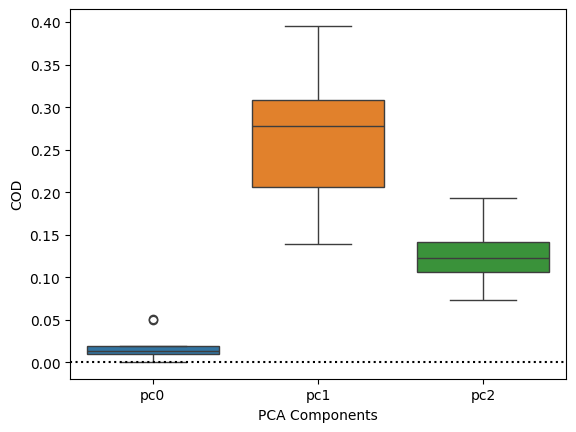

In [4]:
sns.boxplot(data=df_r2_corr)
plt.axhline(0, color="k", ls=":")
plt.xlabel('PCA Components')
plt.ylabel("COD")
plt.show()

80 samples (same as paper)

In [5]:
df_80samples_pca0 = pd.read_csv("results/80samples_scores_pca__pca0.csv")
df_80samples_pca1 = pd.read_csv("results/80samples_scores_pca__pca1.csv")
df_80samples_pca2 = pd.read_csv("results/80samples_scores_pca__pca2.csv")

data_80samples_r_corr = {
    'pc0' : df_80samples_pca0["pearsonr"],
    'pc1' : df_80samples_pca1["pearsonr"],
    'pc2' : df_80samples_pca2["pearsonr"],
}

data_80samples_r2_corr = {
    'pc0' : df_80samples_pca0["r2_corr"],
    'pc1' : df_80samples_pca1["r2_corr"],
    'pc2' : df_80samples_pca2["r2_corr"],
}

df_80samples_r_corr = pd.DataFrame(data_80samples_r_corr)
df_80samples_r2_corr = pd.DataFrame(data_80samples_r2_corr)

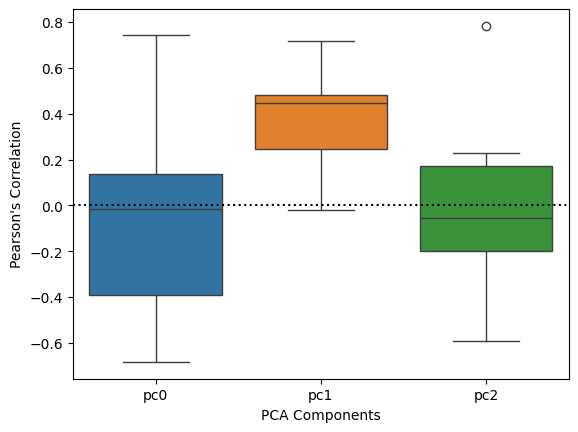

In [6]:
sns.boxplot(data=df_80samples_r_corr)
plt.axhline(0, color="k", ls=":")
plt.xlabel('PCA Components')
plt.ylabel("Pearson's Correlation")
plt.show()

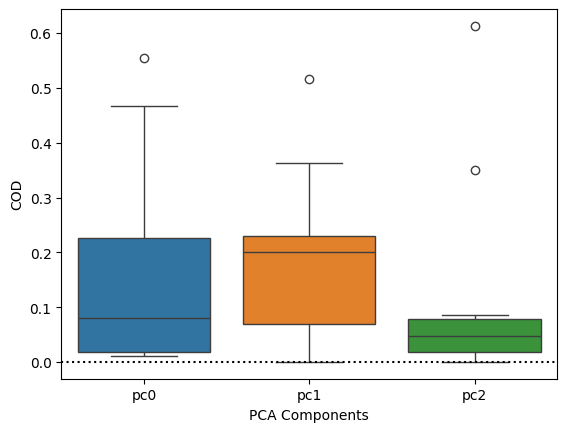

In [7]:
sns.boxplot(data=df_80samples_r2_corr)
plt.axhline(0, color="k", ls=":")
plt.xlabel('PCA Components')
plt.ylabel("COD")
plt.show()